In [31]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from tiemcourse_interference import *
from scipy import stats
from scipy.stats import norm


In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_decoded_angle_shortversion.xlsx')

In [72]:
def err_deg(a1,ref):
    ### Calculate the error ref-a1 in an efficient way in the circular space
    ### it uses complex numbers!
    ### Input in degrees (0-360)
    a1=np.radians(a1)
    ref=np.radians(ref)
    err = np.angle(np.exp(1j*ref)/np.exp(1j*(a1) ), deg=True) 
    err=round(err, 2)
    return err

In [73]:
df.head(10)

,Unnamed: 0,decoded_angle,target_centered,label_target,corresp_isolated,distractor_centered,corresp_isolated_distractor,label_distractor,new_index,TR,subject,brain_region,condition
0,0,191.899586,180,T,False,164.0,False,Dist,0,0.0,d001,visual,1_0.2
1,1,167.383801,180,NT1,False,153.7,False,Dist_NT1,0,0.0,d001,visual,1_0.2
2,2,179.330895,180,NT2,True,283.0,True,Dist_NT2,0,0.0,d001,visual,1_0.2
3,3,171.279897,180,T,False,161.5,False,Dist,4,0.0,d001,visual,1_0.2
4,4,213.186466,180,NT1,False,153.5,False,Dist_NT1,4,0.0,d001,visual,1_0.2
5,5,150.335027,180,NT2,True,307.0,True,Dist_NT2,4,0.0,d001,visual,1_0.2
6,6,193.610179,180,T,True,349.0,True,Dist,7,0.0,d001,visual,1_0.2
7,7,178.051604,180,NT1,False,163.8,False,Dist_NT1,7,0.0,d001,visual,1_0.2
8,8,178.000366,180,NT2,False,150.5,False,Dist_NT2,7,0.0,d001,visual,1_0.2
9,9,152.943563,180,T,True,246.0,True,Dist,8,0.0,d001,visual,1_0.2


In [74]:
error_ = [err_deg(df.iloc[i].decoded_angle, df.iloc[i].target_centered) for i in range(len(df)) ]
distr_distance = [err_deg(df.iloc[i].distractor_centered, df.iloc[i].target_centered) for i in range(len(df)) ]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in cdouble_scalars
  import sys


In [75]:
df['error'] = error_
df['error_abs'] = abs(np.array(error_))
df['distractor_distance'] = distr_distance
df['distractor_distance_abs'] = abs(np.array(distr_distance))

In [76]:
df['sign_dist'] = df.distractor_distance<0
df['sign_dist'] = df['sign_dist'].replace([True, False], ['ccw', 'cw']) #position of the distractor relative to the target

In [77]:
##CW-CCW bias

Ttest_indResult(statistic=4.363730152421711, pvalue=1.2873204620956338e-05)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


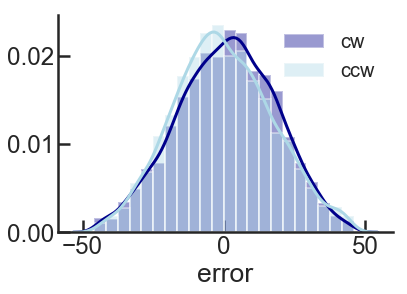

In [125]:
## All trials & all TRS

fit_= 'kde' #'gaussian' 'kde'
region_ = 'visual' #'visual' 'ips' 'pfc'
colors_ = {}
colors_['visual']=['darkblue', 'lightblue']
colors_['ips']=['darkorange','peachpuff']
colors_['pfc']=['forestgreen', 'lightgreen']


cw_data = df.loc[(df['sign_dist']=='cw') & (df['brain_region']==region_)].error[~np.isnan(df.loc[(df['sign_dist']=='cw') & (df['brain_region']==region_)].error)]
ccw_data = df.loc[(df['sign_dist']=='ccw') & (df['brain_region']==region_)].error[~np.isnan(df.loc[(df['sign_dist']=='ccw') & (df['brain_region']==region_)].error)]

print(stats.ttest_ind(cw_data, ccw_data))

if fit_ == 'gaussian':
    sns.distplot( cw_data,  color=colors_[region_][0], label='cw', bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":colors_[region_][0], 'linewidth':4})
    sns.distplot( ccw_data,  color=colors_[region_][1], label='ccw', bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":colors_[region_][1], 'linewidth':4})
else:
    sns.distplot( cw_data,  color=colors_[region_][0], label='cw', bins=np.linspace(-50,50,25))
    sns.distplot( ccw_data,  color=colors_[region_][1], label='ccw', bins=np.linspace(-50,50,25))


plt.legend(frameon=False, loc=1, fontsize=20)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: Matplo

visual:   
Ttest_indResult(statistic=4.363730152421711, pvalue=1.2873204620956338e-05)
 
visual:   
Ttest_indResult(statistic=4.363730152421711, pvalue=1.2873204620956338e-05)
 
visual:   
Ttest_indResult(statistic=4.363730152421711, pvalue=1.2873204620956338e-05)
 


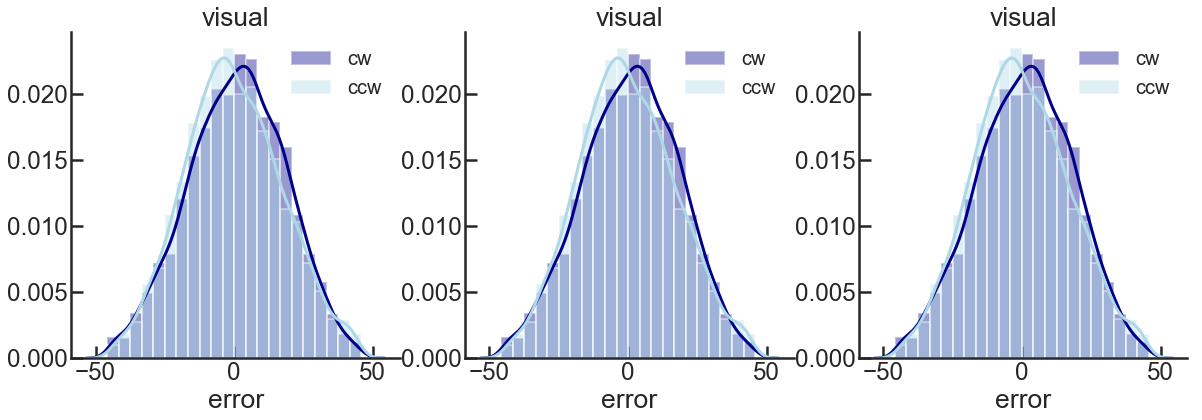

In [145]:
## All trials & all TRS


fit_= 'kde' #'gaussian' 'kde'
region_ = 'visual' #'visual' 'ips' 'pfc'
colors_ = {}
colors_['visual']=['darkblue', 'lightblue']
colors_['ips']=['darkorange','peachpuff']
colors_['pfc']=['forestgreen', 'lightgreen']


f = plt.figure(figsize=(20,6))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
axes=[ax1,ax2,ax3]


for idx, region_ in enumerate(['visual', 'visual', 'visual']):
    plt.subplot(int(str(13) + str(idx+1)))
    cw_data = df.loc[(df['sign_dist']=='cw') & (df['brain_region']==region_)].error[~np.isnan(df.loc[(df['sign_dist']=='cw') & (df['brain_region']==region_)].error)]
    ccw_data = df.loc[(df['sign_dist']=='ccw') & (df['brain_region']==region_)].error[~np.isnan(df.loc[(df['sign_dist']=='ccw') & (df['brain_region']==region_)].error)]

    print(region_ + ':   ' )
    print(stats.ttest_ind(cw_data, ccw_data))
    print(' ')

    if fit_ == 'gaussian':
        sns.distplot(cw_data,  color=colors_[region_][0], label='cw', ax=axes[idx], bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":colors_[region_][0], 'linewidth':4})
        sns.distplot( ccw_data,  color=colors_[region_][1], label='ccw', ax=axes[idx], bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":colors_[region_][1], 'linewidth':4})
    else:
        sns.distplot( cw_data,  color=colors_[region_][0], label='cw',  ax=axes[idx], bins=np.linspace(-50,50,25))
        sns.distplot( ccw_data,  color=colors_[region_][1], label='ccw',   ax=axes[idx],bins=np.linspace(-50,50,25))


    plt.legend(frameon=False, loc=1, fontsize=20)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.gca().set_title(region_)

plt.show()

In [ ]:
## In cw trials, negative error means repulsion
## In ccw trials, negative error means attraction

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: Matplo

visual:   
Ttest_indResult(statistic=6.073544433674286, pvalue=1.2973946741671555e-09)
 
visual:   
Ttest_indResult(statistic=6.073544433674286, pvalue=1.2973946741671555e-09)
 
visual:   
Ttest_indResult(statistic=6.073544433674286, pvalue=1.2973946741671555e-09)
 


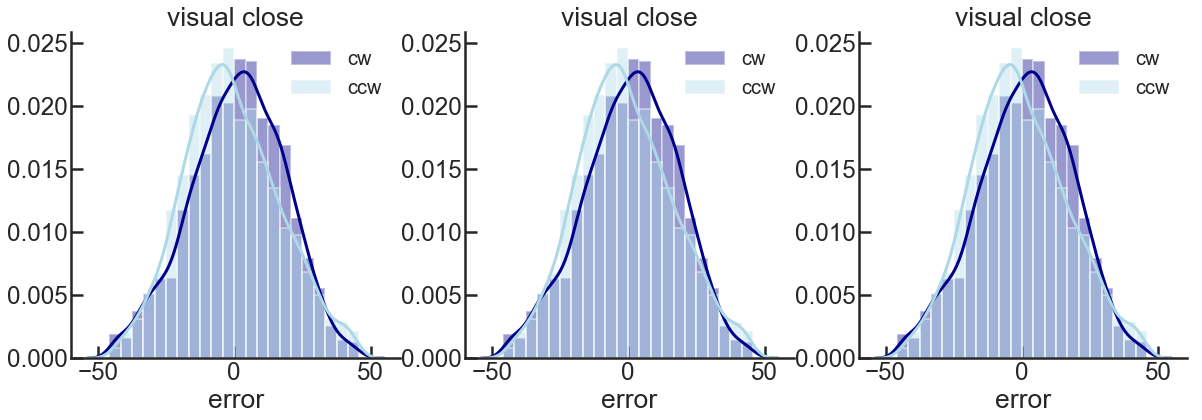

In [146]:
## Close trials & all TRS

fit_= 'kde' #'gaussian' 'kde'
region_ = 'visual' #'visual' 'ips' 'pfc'
colors_ = {}
colors_['visual']=['darkblue', 'lightblue']
colors_['ips']=['darkorange','peachpuff']
colors_['pfc']=['forestgreen', 'lightgreen']


f = plt.figure(figsize=(20,6))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
axes=[ax1,ax2,ax3]


for idx, region_ in enumerate(['visual', 'visual', 'visual']):
    plt.subplot(int(str(13) + str(idx+1)))
    cw_data = df.loc[(df['sign_dist']=='cw') & (df['brain_region']==region_) & (df['distractor_distance_abs']<45)].error[~np.isnan(df.loc[(df['sign_dist']=='cw') & (df['brain_region']==region_) & (df['distractor_distance_abs']<45)].error)]
    ccw_data = df.loc[(df['sign_dist']=='ccw') & (df['brain_region']==region_)& (df['distractor_distance_abs']<45)].error[~np.isnan(df.loc[(df['sign_dist']=='ccw') & (df['brain_region']==region_) & (df['distractor_distance_abs']<45)].error)]

    print(region_ + ':   ' )
    print(stats.ttest_ind(cw_data, ccw_data))
    print(' ')

    if fit_ == 'gaussian':
        sns.distplot(cw_data,  color=colors_[region_][0], label='cw', ax=axes[idx], bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":colors_[region_][0], 'linewidth':4})
        sns.distplot( ccw_data,  color=colors_[region_][1], label='ccw', ax=axes[idx], bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":colors_[region_][1], 'linewidth':4})
    else:
        sns.distplot( cw_data,  color=colors_[region_][0], label='cw',  ax=axes[idx], bins=np.linspace(-50,50,25))
        sns.distplot( ccw_data,  color=colors_[region_][1], label='ccw',   ax=axes[idx],bins=np.linspace(-50,50,25))


    plt.legend(frameon=False, loc=1, fontsize=20)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.gca().set_title(region_ + ' close')

plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 0.03)

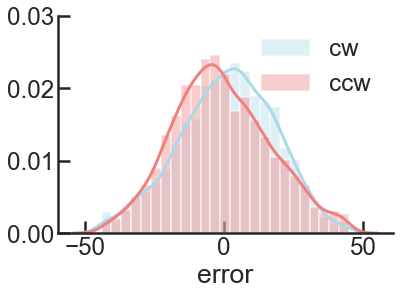

In [86]:
## Close trials & all TRS

cw_data = df.loc[(df['sign_dist']=='cw') & (df['distractor_distance_abs']<45)].error[~np.isnan(df.loc[(df['sign_dist']=='cw') & (df['distractor_distance_abs']<45)].error)]
ccw_data = df.loc[(df['sign_dist']=='ccw') & (df['distractor_distance_abs']<45)].error[~np.isnan(df.loc[(df['sign_dist']=='ccw') & (df['distractor_distance_abs']<45)].error)]

sns.distplot( cw_data,  color='lightblue', label='cw', bins=25)
sns.distplot( ccw_data,  color='lightcoral', label='ccw', bins=25)
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.ylim(0, 0.03)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


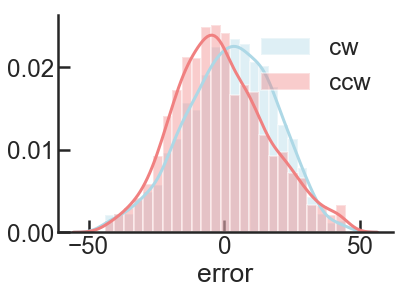

Ttest_indResult(statistic=6.634520292859998, pvalue=3.657827132786091e-11)


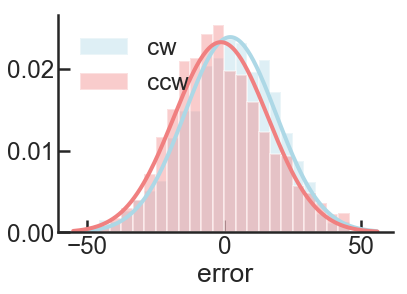

In [109]:
## Close trials and TRs of the delay period (kde and gaussian fit)

cw_data = df.loc[(df['sign_dist']=='cw') & (df['distractor_distance_abs']<45) & ((df['TR']>= 9.34) & (df['TR']<= 23.35))].error[~np.isnan(df.loc[(df['sign_dist']=='cw') & (df['distractor_distance_abs']<45) & ((df['TR']>= 9.34) & (df['TR']<= 23.35))].error)]
ccw_data = df.loc[(df['sign_dist']=='ccw') & (df['distractor_distance_abs']<45) & ((df['TR']>= 9.34) & (df['TR']<= 23.35))].error[~np.isnan(df.loc[(df['sign_dist']=='ccw') & (df['distractor_distance_abs']<45) & ((df['TR']>= 9.34) & (df['TR']<= 23.35))].error)]

sns.distplot( cw_data,  color='lightblue', label='cw', bins=25)
sns.distplot( ccw_data,  color='lightcoral', label='ccw', bins=25)
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.ylim(0, 0.03)
plt.show()

print(stats.ttest_ind(cw_data, ccw_data))

sns.distplot( cw_data,  color='lightblue', label='cw', bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":'lightblue', 'linewidth':4})
sns.distplot( ccw_data,  color='lightcoral', label='ccw', bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":'lightcoral', 'linewidth':4})
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.ylim(0, 0.03)





C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


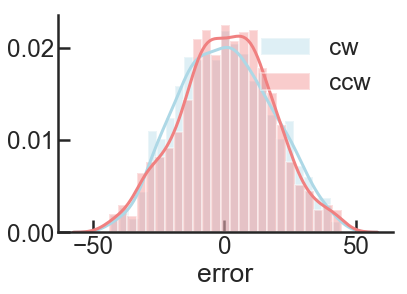

Ttest_indResult(statistic=-0.4354020053970604, pvalue=0.6633146255878899)


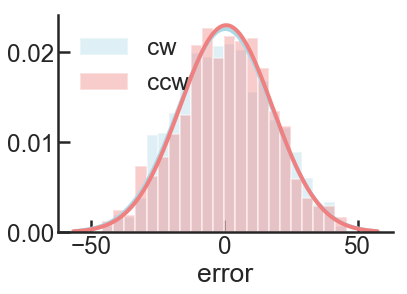

In [108]:
## Far trials and TRs of the delay period (kde and gaussian fit)

cw_data = df.loc[(df['sign_dist']=='cw') & (df['distractor_distance_abs']>45) & ((df['TR']>= 9.34) & (df['TR']<= 23.35))].error[~np.isnan(df.loc[(df['sign_dist']=='cw') & (df['distractor_distance_abs']>45) & ((df['TR']>= 9.34) & (df['TR']<= 23.35))].error)]
ccw_data = df.loc[(df['sign_dist']=='ccw') & (df['distractor_distance_abs']>45) & ((df['TR']>= 9.34) & (df['TR']<= 23.35))].error[~np.isnan(df.loc[(df['sign_dist']=='ccw') & (df['distractor_distance_abs']>45) & ((df['TR']>= 9.34) & (df['TR']<= 23.35))].error)]

sns.distplot( cw_data,  color='lightblue', label='cw', bins=25)
sns.distplot( ccw_data,  color='lightcoral', label='ccw', bins=25)
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.ylim(0, 0.03)
plt.show()

print(stats.ttest_ind(cw_data, ccw_data))


sns.distplot( cw_data,  color='lightblue', label='cw', bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":'lightblue', 'linewidth':4})
sns.distplot( ccw_data,  color='lightcoral', label='ccw', bins=np.linspace(-50,50,25), fit=norm, kde=False, fit_kws={"color":'lightcoral', 'linewidth':4})
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.ylim(0, 0.03)



In [79]:
def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)




def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(np.array(response)[i], np.array(reference)[i])<=circ_dist(np.array(target)[i], np.array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)

        interferences.append(Err_interference)
    
    return interferences

In [80]:
df['interference'] = Interference_effects(df.target_centered.values, df.decoded_angle.values, df.distractor_centered.values)


In [81]:
df.head(10)

,Unnamed: 0,decoded_angle,target_centered,label_target,corresp_isolated,distractor_centered,corresp_isolated_distractor,label_distractor,new_index,TR,subject,brain_region,condition,error,error_abs,distractor_distance,distractor_distance_abs,sign_dist,interference
0,0,191.899586,180,T,False,164.0,False,Dist,0,0.0,d001,visual,1_0.2,-11.90,11.90,16.0,16.0,cw,-11.90
1,1,167.383801,180,NT1,False,153.7,False,Dist_NT1,0,0.0,d001,visual,1_0.2,12.62,12.62,26.3,26.3,cw,12.62
2,2,179.330895,180,NT2,True,283.0,True,Dist_NT2,0,0.0,d001,visual,1_0.2,0.67,0.67,-103.0,103.0,ccw,-0.67
3,3,171.279897,180,T,False,161.5,False,Dist,4,0.0,d001,visual,1_0.2,8.72,8.72,18.5,18.5,cw,8.72
4,4,213.186466,180,NT1,False,153.5,False,Dist_NT1,4,0.0,d001,visual,1_0.2,-33.19,33.19,26.5,26.5,cw,-33.19
5,5,150.335027,180,NT2,True,307.0,True,Dist_NT2,4,0.0,d001,visual,1_0.2,29.66,29.66,-127.0,127.0,ccw,-29.66
6,6,193.610179,180,T,True,349.0,True,Dist,7,0.0,d001,visual,1_0.2,-13.61,13.61,-169.0,169.0,ccw,13.61
7,7,178.051604,180,NT1,False,163.8,False,Dist_NT1,7,0.0,d001,visual,1_0.2,1.95,1.95,16.2,16.2,cw,1.95
8,8,178.000366,180,NT2,False,150.5,False,Dist_NT2,7,0.0,d001,visual,1_0.2,2.00,2.00,29.5,29.5,cw,2.00
9,9,152.943563,180,T,True,246.0,True,Dist,8,0.0,d001,visual,1_0.2,27.06,27.06,-66.0,66.0,ccw,-27.06


In [ ]:
## Interference attraction-repulsion

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


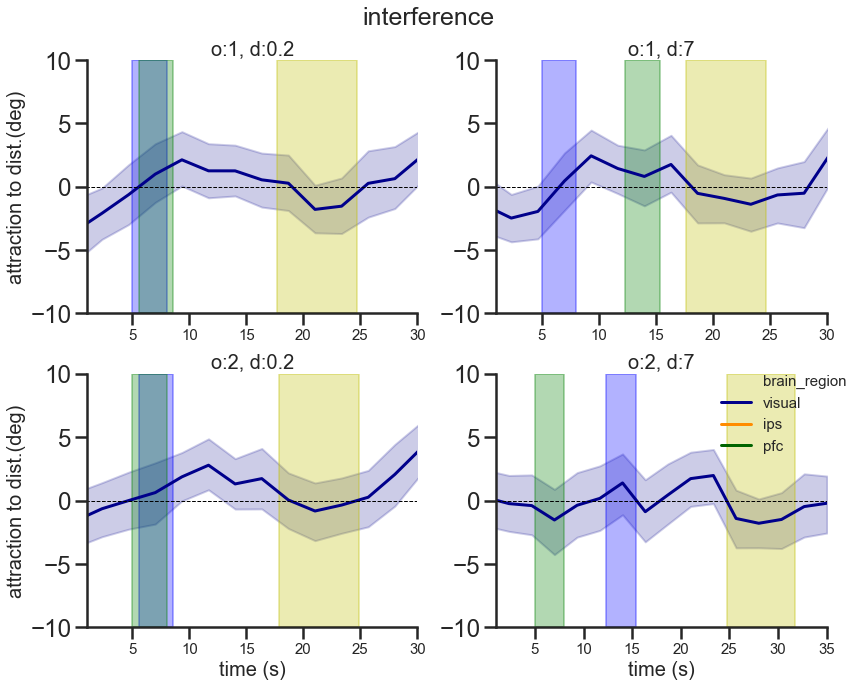

In [40]:
tiemcourse_interference(df_plot=df, title_plot='interference', ylims=[-10,10])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


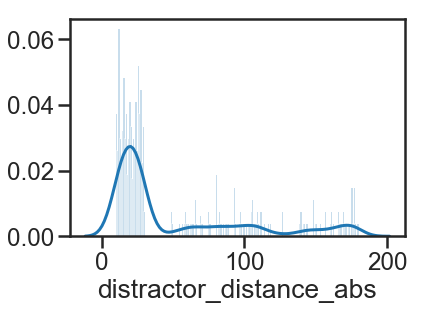

In [43]:
sns.distplot(df.distractor_distance_abs, bins=200)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


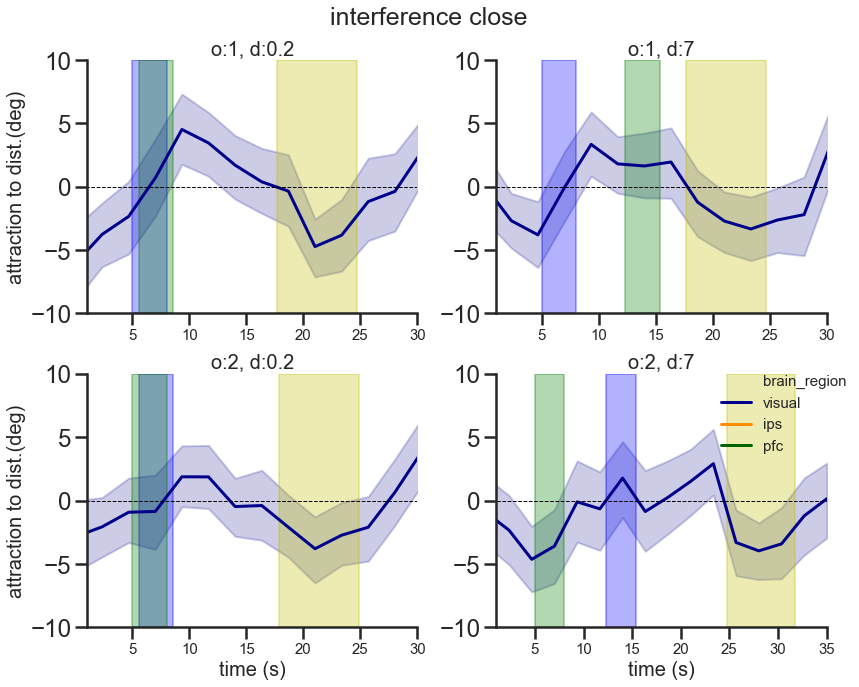

In [45]:
tiemcourse_interference(df_plot=df.loc[df['distractor_distance_abs']<45], 
                        title_plot='interference close', ylims=[-10,10])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


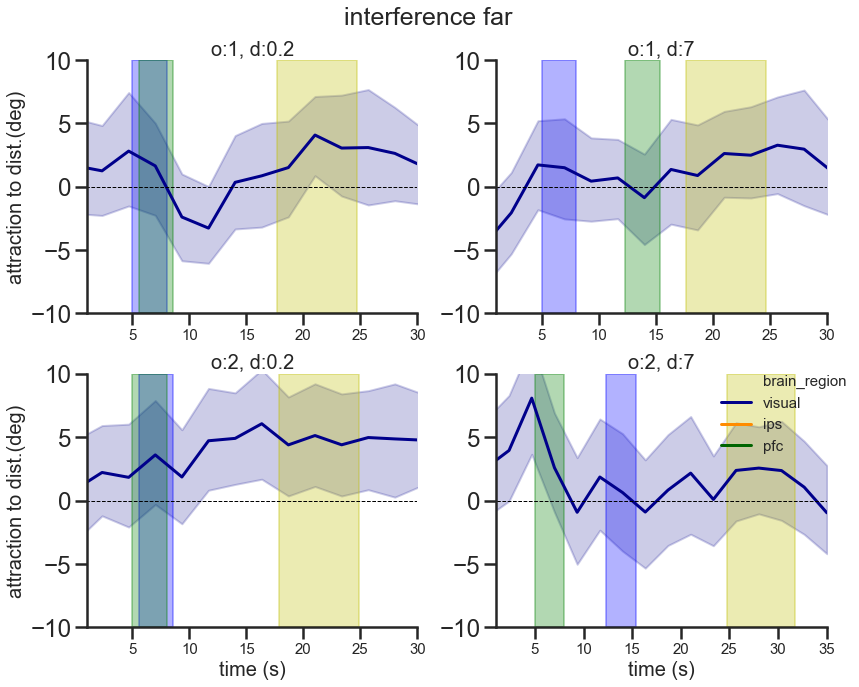

In [46]:
tiemcourse_interference(df_plot=df.loc[df['distractor_distance_abs']>45], 
                        title_plot='interference far', ylims=[-10,10])

In [47]:
## Responded target

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


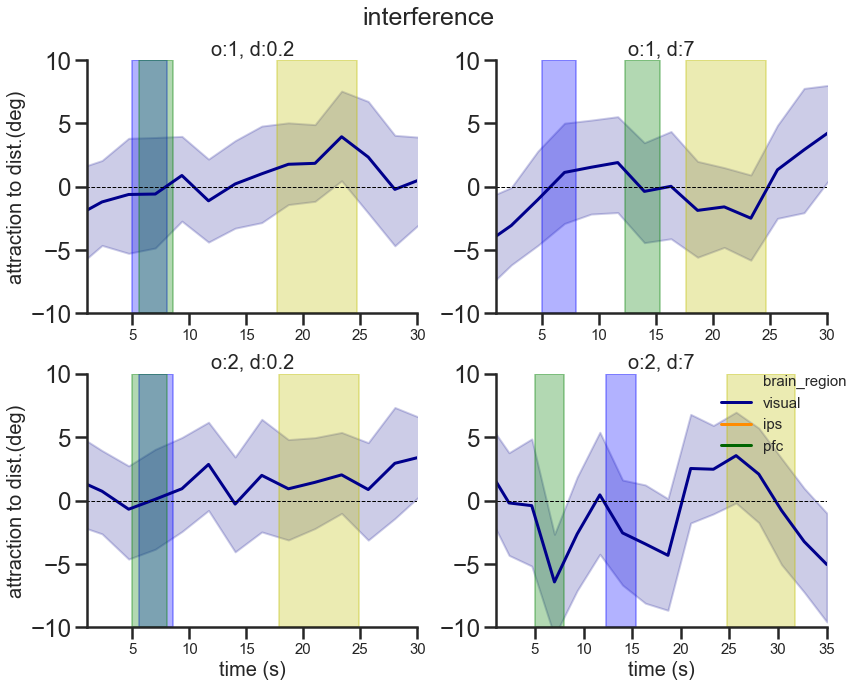

In [48]:
tiemcourse_interference(df_plot=df.loc[df['label_target']=='T'], title_plot='interference', ylims=[-10,10])

In [ ]:
tiemcourse_interference(df_plot=df.loc[df['distractor_distance_abs']<45], 
                        title_plot='interference close', ylims=[-10,10])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


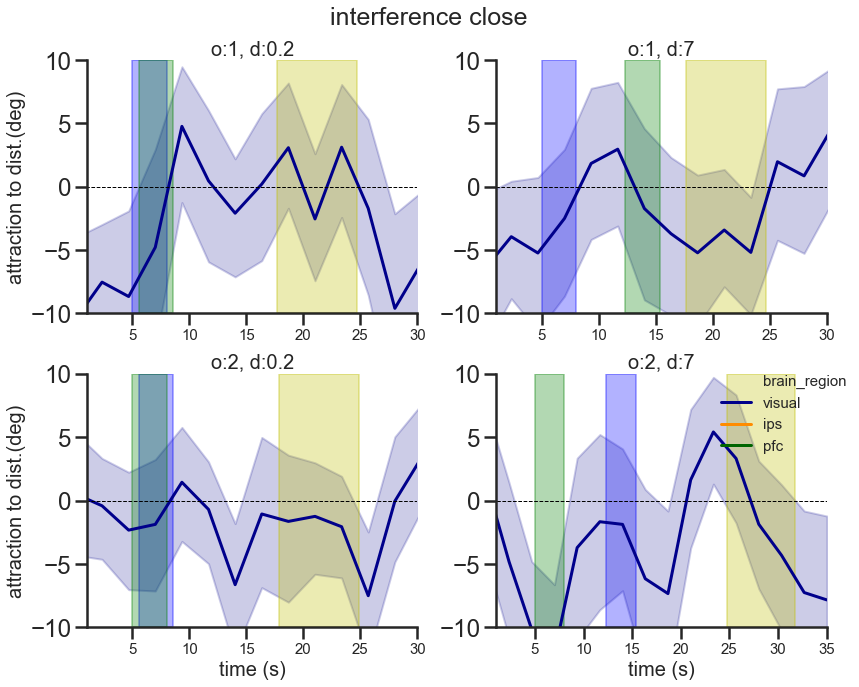

In [49]:
tiemcourse_interference(df_plot=df.loc[(df['label_target']=='T') & (df['distractor_distance_abs']<45)], title_plot='interference close', ylims=[-10,10])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


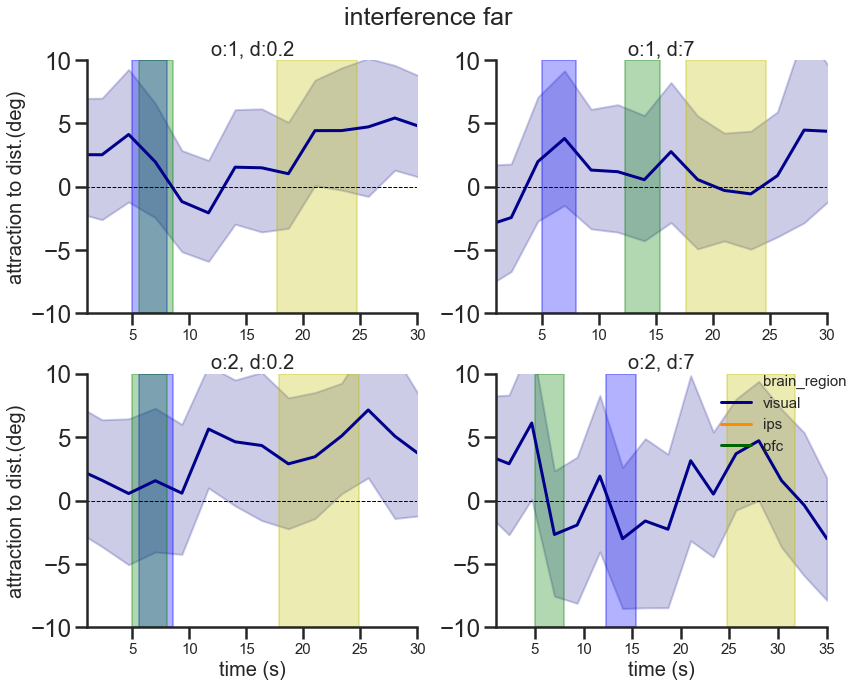

In [50]:
tiemcourse_interference(df_plot=df.loc[(df['label_target']=='T') & (df['distractor_distance_abs']>45)], title_plot='interference far', ylims=[-10,10])